In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import json
import numpy as np

In [53]:
X = None
y = None
start = True
fixed_size = 250
max_length = 0

with open("../data/domain1_train.json") as f:
    for line in f:
        data = json.loads(line)
        if start:
            elements_to_add = fixed_size - len(data["text"])
            X = np.array([np.pad(data["text"], (0, elements_to_add), 'constant')])
            y = np.array(data["label"])
            start = False
        else:
            # X = np.append(X, [data["text"]], axis=0)
            elements_to_add = fixed_size - len(data["text"])
            X = np.append(X, [np.pad(data["text"], (0, elements_to_add), 'constant')], axis=0)
            y = np.append(y, data["label"])
        if max_length < len(data["text"]):
            max_length = len(data["text"])

print(f"Max length: {max_length}")

Max length: 238


In [55]:
X

array([[  70,  746,  825, ...,    0,    0,    0],
       [1209,  179, 1952, ...,    0,    0,    0],
       [ 287,    3, 3330, ...,    0,    0,    0],
       ...,
       [1820,   93,    3, ...,    0,    0,    0],
       [   5,   48,    6, ...,    0,    0,    0],
       [ 126,    1,  199, ...,    0,    0,    0]])

In [35]:
# fixed_X = None
# start = True
# for i in X[:100]:
#     # Calculate how many 0s need to be added
#     elements_to_add = max_length - len(i)

#     # Pad the array with zeros to reach the fixed length
#     if start:
#         fixed_X = np.array([np.pad(i, (0, elements_to_add))])
#         start = False
#     else:
#         fixed_X = np.append(fixed_X, [np.pad(i, (0, elements_to_add), 'constant')], axis=0)

In [56]:
X.shape

(19500, 250)

In [11]:
# X, y = make_classification(n_samples=1000, n_features=4,
#     n_informative=2, n_redundant=0, random_state=0, shuffle=True)

In [78]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [80]:
print(clf.predict([X[2]]), y[2])

[1] 1


In [88]:
from sklearn.model_selection import cross_val_score

scores = []
for i in range(2, 37, 5):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    score = sum(cross_val_score(clf, X, y, cv=10))/10
    scores.append(score)

print(scores)

[0.6806153846153846, 0.719025641025641, 0.7886666666666667, 0.8215897435897437, 0.8367179487179486, 0.8407692307692308, 0.8436923076923076]


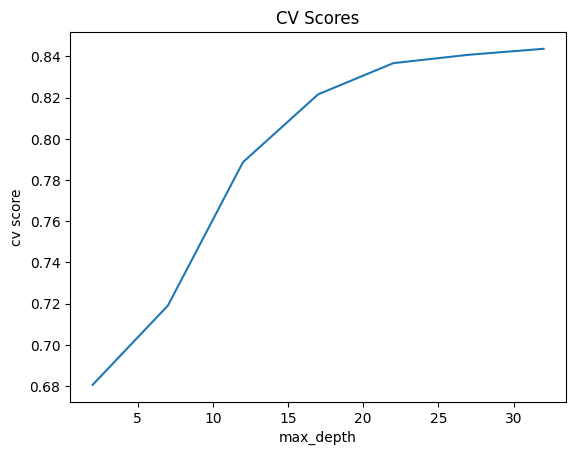

In [89]:
import matplotlib.pyplot as plt

# plotting the points 
plt.plot(range(2, 37, 5), scores)
  
# naming the x axis
plt.xlabel('max_depth')
# naming the y axis
plt.ylabel('cv score')
  
# giving a title to my graph
plt.title('CV Scores')
  
# function to show the plot
plt.show()